# What size company and location provides the best prospects for Data Analyst position?
    #Salary Expectations: Which companies and locations have the best salary expections?
    #Positions: #Is there correlation between position and salary offered by the company?

In [90]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
from wordcloud import WordCloud, STOPWORDS
from scipy.stats import linregress

In [91]:
# Load in file
file1 = "..\DataAnalystJobProspects\DataAnalyst.csv"

# Explore DataSet

In [92]:
#Read and display the CSV with Pandas
old_data = pd.read_csv(file1)
old_data.head(2)

,Unnamed: 0,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,Type of ownership,Industry,Sector,Revenue,Competitors,Easy Apply
0,0,"Data Analyst, Center on Immigration and Justic...",$37K-$66K (Glassdoor est.),Are you eager to roll up your sleeves and harn...,3.2,Vera Institute of Justice\n3.2,"New York, NY","New York, NY",201 to 500 employees,1961,Nonprofit Organization,Social Assistance,Non-Profit,$100 to $500 million (USD),-1,True
1,1,Quality Data Analyst,$37K-$66K (Glassdoor est.),Overview\n\nProvides analytical and technical ...,3.8,Visiting Nurse Service of New York\n3.8,"New York, NY","New York, NY",10000+ employees,1893,Nonprofit Organization,Health Care Services & Hospitals,Health Care,$2 to $5 billion (USD),-1,-1


# Clean DataSet

In [93]:
#Remove Unnamed Column
data = old_data.drop(columns=['Unnamed: 0', 'Job Description', 'Headquarters', 'Founded', 'Competitors', 'Revenue', "Easy Apply"])
data.head(2)

,Job Title,Salary Estimate,Rating,Company Name,Location,Size,Type of ownership,Industry,Sector
0,"Data Analyst, Center on Immigration and Justic...",$37K-$66K (Glassdoor est.),3.2,Vera Institute of Justice\n3.2,"New York, NY",201 to 500 employees,Nonprofit Organization,Social Assistance,Non-Profit
1,Quality Data Analyst,$37K-$66K (Glassdoor est.),3.8,Visiting Nurse Service of New York\n3.8,"New York, NY",10000+ employees,Nonprofit Organization,Health Care Services & Hospitals,Health Care


In [94]:
#Remove missing values. Replace all missing values in dataset
#data.dropna(inplace = True) only returns 28 values
data=data.replace(-1,np.nan)
data=data.replace(-1.0,np.nan)
data=data.replace('-1',np.nan)
data.head(5)


,Job Title,Salary Estimate,Rating,Company Name,Location,Size,Type of ownership,Industry,Sector
0,"Data Analyst, Center on Immigration and Justic...",$37K-$66K (Glassdoor est.),3.2,Vera Institute of Justice\n3.2,"New York, NY",201 to 500 employees,Nonprofit Organization,Social Assistance,Non-Profit
1,Quality Data Analyst,$37K-$66K (Glassdoor est.),3.8,Visiting Nurse Service of New York\n3.8,"New York, NY",10000+ employees,Nonprofit Organization,Health Care Services & Hospitals,Health Care
2,"Senior Data Analyst, Insights & Analytics Team...",$37K-$66K (Glassdoor est.),3.4,Squarespace\n3.4,"New York, NY",1001 to 5000 employees,Company - Private,Internet,Information Technology
3,Data Analyst,$37K-$66K (Glassdoor est.),4.1,Celerity\n4.1,"New York, NY",201 to 500 employees,Subsidiary or Business Segment,IT Services,Information Technology
4,Reporting Data Analyst,$37K-$66K (Glassdoor est.),3.9,FanDuel\n3.9,"New York, NY",501 to 1000 employees,Company - Private,Sports & Recreation,"Arts, Entertainment & Recreation"


In [95]:
data['Job Title'],data[''] = data['Job Title'].str.split(',', 1).str
data['Company Name'],data[''] = data['Company Name'].str.split('\n', 1).str 
data.head(10)

<ipython-input-95-beec0d40ec35>:1: FutureWarning: Columnar iteration over characters will be deprecated in future releases.
  data['Job Title'],data[''] = data['Job Title'].str.split(',', 1).str
<ipython-input-95-beec0d40ec35>:2: FutureWarning: Columnar iteration over characters will be deprecated in future releases.
  data['Company Name'],data[''] = data['Company Name'].str.split('\n', 1).str


,Job Title,Salary Estimate,Rating,Company Name,Location,Size,Type of ownership,Industry,Sector,
0,Data Analyst,$37K-$66K (Glassdoor est.),3.2,Vera Institute of Justice,"New York, NY",201 to 500 employees,Nonprofit Organization,Social Assistance,Non-Profit,3.2
1,Quality Data Analyst,$37K-$66K (Glassdoor est.),3.8,Visiting Nurse Service of New York,"New York, NY",10000+ employees,Nonprofit Organization,Health Care Services & Hospitals,Health Care,3.8
2,Senior Data Analyst,$37K-$66K (Glassdoor est.),3.4,Squarespace,"New York, NY",1001 to 5000 employees,Company - Private,Internet,Information Technology,3.4
3,Data Analyst,$37K-$66K (Glassdoor est.),4.1,Celerity,"New York, NY",201 to 500 employees,Subsidiary or Business Segment,IT Services,Information Technology,4.1
4,Reporting Data Analyst,$37K-$66K (Glassdoor est.),3.9,FanDuel,"New York, NY",501 to 1000 employees,Company - Private,Sports & Recreation,"Arts, Entertainment & Recreation",3.9
5,Data Analyst,$37K-$66K (Glassdoor est.),3.9,Point72,"New York, NY",1001 to 5000 employees,Company - Private,Investment Banking & Asset Management,Finance,3.9
6,Business/Data Analyst (FP&A),$37K-$66K (Glassdoor est.),4.4,Two Sigma,"New York, NY",1001 to 5000 employees,Company - Private,Investment Banking & Asset Management,Finance,4.4
7,Data Science Analyst,$37K-$66K (Glassdoor est.),3.7,GNY Insurance Companies,"New York, NY",201 to 500 employees,Company - Private,Insurance Carriers,Insurance,3.7
8,Data Analyst,$37K-$66K (Glassdoor est.),4.0,DMGT,"New York, NY",5001 to 10000 employees,Company - Public,Venture Capital & Private Equity,Finance,4.0
9,Data Analyst,$37K-$66K (Glassdoor est.),4.4,Riskified,"New York, NY",501 to 1000 employees,Company - Private,Research & Development,Business Services,4.4


# Split Salary Estimate column to create two columns to show the salary range

In [96]:
# new data frame with split value columns 
new = data["Salary Estimate"].str.split("-", n = 1, expand = True) 
  
# making separate first name column from new data frame 
data["Minimum Salary"]= new[0] 
  
# making separate last name column from new data frame 
data["Maximum Salary"]= new[1] 
data['Maximum Salary'],data['Glass'] = data['Maximum Salary'].str.split('(', 1).str   

# Dropping old Name columns 
data.drop(columns =["Salary Estimate"], inplace = True) 
data.drop(columns = ["Glass"], inplace = True) 

# df display 
data


<ipython-input-96-d49662163925>:9: FutureWarning: Columnar iteration over characters will be deprecated in future releases.
  data['Maximum Salary'],data['Glass'] = data['Maximum Salary'].str.split('(', 1).str


,Job Title,Rating,Company Name,Location,Size,Type of ownership,Industry,Sector,,Minimum Salary,Maximum Salary
0,Data Analyst,3.2,Vera Institute of Justice,"New York, NY",201 to 500 employees,Nonprofit Organization,Social Assistance,Non-Profit,3.2,$37K,$66K
1,Quality Data Analyst,3.8,Visiting Nurse Service of New York,"New York, NY",10000+ employees,Nonprofit Organization,Health Care Services & Hospitals,Health Care,3.8,$37K,$66K
2,Senior Data Analyst,3.4,Squarespace,"New York, NY",1001 to 5000 employees,Company - Private,Internet,Information Technology,3.4,$37K,$66K
3,Data Analyst,4.1,Celerity,"New York, NY",201 to 500 employees,Subsidiary or Business Segment,IT Services,Information Technology,4.1,$37K,$66K
4,Reporting Data Analyst,3.9,FanDuel,"New York, NY",501 to 1000 employees,Company - Private,Sports & Recreation,"Arts, Entertainment & Recreation",3.9,$37K,$66K
...,...,...,...,...,...,...,...,...,...,...,...
2248,RQS - IHHA - 201900004460 -1q Data Security An...,2.5,"Avacend, Inc.","Denver, CO",51 to 200 employees,Company - Private,Staffing & Outsourcing,Business Services,2.5,$78K,$104K
2249,Senior Data Analyst (Corporate Audit),2.9,Arrow Electronics,"Centennial, CO",10000+ employees,Company - Public,Wholesale,Business Services,2.9,$78K,$104K
2250,Technical Business Analyst (SQL,NaN,Spiceorb,"Denver, CO",NaN,NaN,NaN,NaN,NaN,$78K,$104K
2251,Data Analyst 3,3.1,Contingent Network Services,"Centennial, CO",201 to 500 employees,Company - Private,Enterprise Software & Network Solutions,Information Technology,3.1,$78K,$104K


# Companies with ratings of 3 or more

In [105]:
data_filtered = data[data['Rating']>= 3]
data_filtered.head()

,Job Title,Rating,Company Name,Location,Size,Type of ownership,Industry,Sector,,Minimum Salary,Maximum Salary
0,Data Analyst,3.2,Vera Institute of Justice,"New York, NY",201 to 500 employees,Nonprofit Organization,Social Assistance,Non-Profit,3.2,$37K,$66K
1,Quality Data Analyst,3.8,Visiting Nurse Service of New York,"New York, NY",10000+ employees,Nonprofit Organization,Health Care Services & Hospitals,Health Care,3.8,$37K,$66K
2,Senior Data Analyst,3.4,Squarespace,"New York, NY",1001 to 5000 employees,Company - Private,Internet,Information Technology,3.4,$37K,$66K
3,Data Analyst,4.1,Celerity,"New York, NY",201 to 500 employees,Subsidiary or Business Segment,IT Services,Information Technology,4.1,$37K,$66K
4,Reporting Data Analyst,3.9,FanDuel,"New York, NY",501 to 1000 employees,Company - Private,Sports & Recreation,"Arts, Entertainment & Recreation",3.9,$37K,$66K


# Data analysis

In [63]:
job_count = data["Job Title"].value_counts()

TypeError: can only concatenate str (not "int") to str

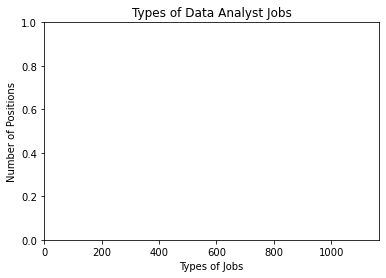

In [66]:
title = graph
jobs = job_count

x_axis = np.arange(0, len(jobs))
tick_locations = []
for x in x_axis:
    tick_locations.append(x)

plt.title("Types of Data Analyst Jobs")
plt.xlabel("Types of Jobs")
plt.ylabel("Number of Positions")

plt.xlim(-0.75, len(jobs)-.25)
plt.ylim(0, max(title) + 5)

plt.bar(x_axis, jobs, facecolor="red", alpha=0.75, align="center")
plt.xticks(tick_locations, title, rotation= 90)
plt.show()


# Word Cloud: Word cloud is a technique for visualising frequent words in a text where the size of the words represents their frequency.

In [ ]:
frequent_words=data['Job Title']

wordcloud = WordCloud(width = 3000, height = 2000, random_state=1, 
                      background_color='salmon', colormap='Set2', 
                      collocations=False, stopwords = STOPWORDS).generate(' '.join(frequent_words))
plt.figure(figsize=(19,9))
plt.axis('off')
plt.title(data['Job Title'].name,fontsize=20)
plt.imshow(wordcloud)
plt.show()